# CUSTOMER CHURN ANALYSIS PROJECT

Loading the modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

Loading the dataset

In [2]:
cc=pd.read_csv('customer_churn.csv')

In [3]:
cc

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
cc.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
cc.shape

(7043, 21)

Observation;

7043 rows and 21 columns in Customer churn Dataset.

In [6]:
cc.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Observation;

Three types of data int, object and float.

In [7]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Observation;

1 float,2 int and 18 object type of data.
NO null Values in Dataset.

# Checking Null Values

In [8]:
cc.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot: >

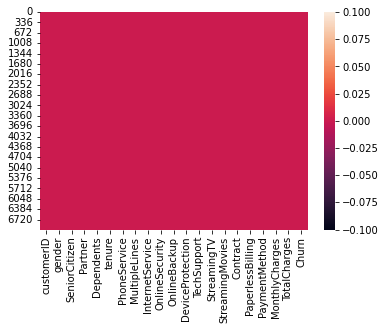

In [9]:
sns.heatmap(cc.isnull())

Observation;

No Null Values in Dataset.

# Statistical Summary

In [10]:
cc.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Observation;

Less variance in mean and median values and 75% and 100% in all columns,

In [11]:
cc.corr().sum()

SeniorCitizen     1.236740
tenure            1.264467
MonthlyCharges    1.468073
dtype: float64

<AxesSubplot: >

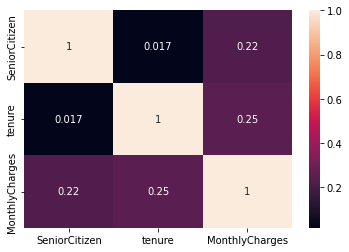

In [12]:
sns.heatmap(cc.corr(),annot=True)

Observation;

All 3 Numeric columns are very less correlated.

# DATA VISUALIZATION OR EDA

In [13]:
cc.keys()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
cc["customerID"].value_counts()

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

customerID is the Id of customer it is not much important for Dataset, so we can drop this column.

In [15]:
cc.drop("customerID",axis=1,inplace=True)

In [16]:
cc.keys()

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

customerID column has been deleted.

In [17]:
cc.shape

(7043, 20)

In [18]:
cc["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

<AxesSubplot: xlabel='gender', ylabel='count'>

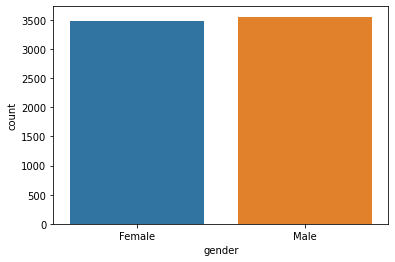

In [19]:
sns.countplot(x="gender",data=cc)

Observation;

Male and Female both gender have almost same data.

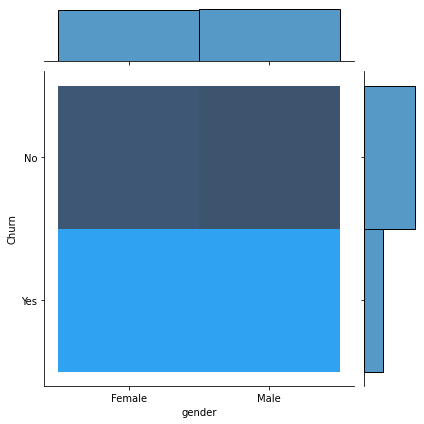

In [20]:
sns.jointplot(x="gender",y="Churn",data=cc,kind="hist")

No data is high for gender.

In [21]:
cc["SeniorCitizen"].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

<AxesSubplot: xlabel='SeniorCitizen', ylabel='count'>

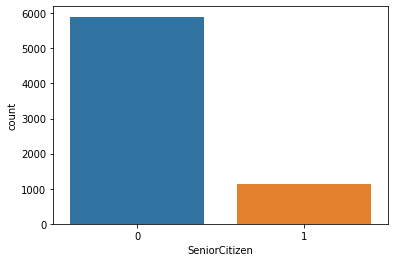

In [22]:
sns.countplot(x="SeniorCitizen",data=cc)

0 type of SeniorCitizen is higher than 1 type of SeniorCitizen.

<AxesSubplot: xlabel='SeniorCitizen', ylabel='Churn'>

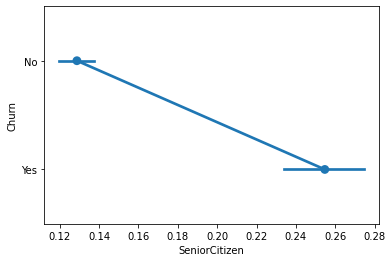

In [23]:
sns.pointplot(x="SeniorCitizen",y="Churn",data=cc)

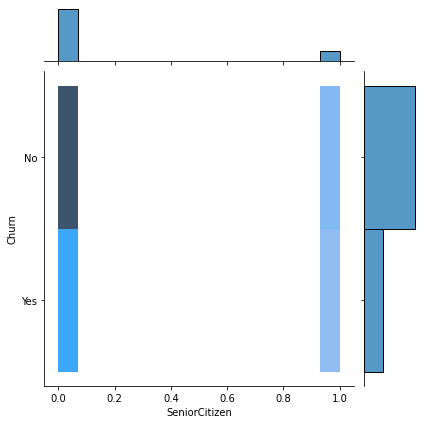

In [24]:
sns.jointplot(x="SeniorCitizen",y="Churn",data=cc,kind="hist")

No data is high for 0 type of SeniorCitizen.

In [25]:
cc["Partner"].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

<AxesSubplot: xlabel='Partner', ylabel='count'>

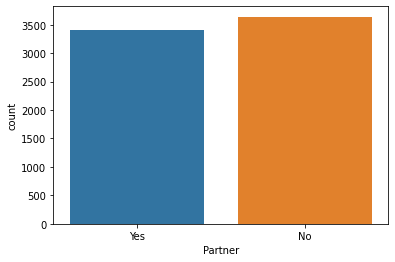

In [26]:
sns.countplot(x="Partner",data=cc)

In partner data yes and No Both have almost same data.

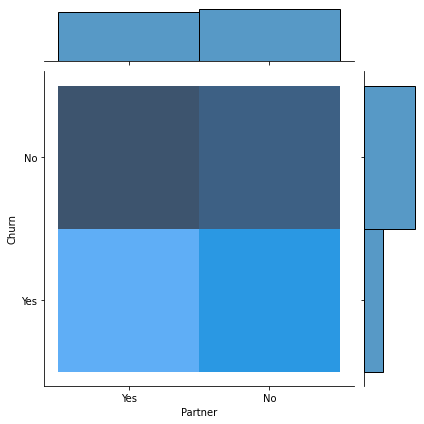

In [27]:
sns.jointplot(x="Partner",y="Churn",data=cc,kind="hist")

No data is high for Partner column.

In [28]:
cc["Dependents"].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

<AxesSubplot: xlabel='Dependents', ylabel='count'>

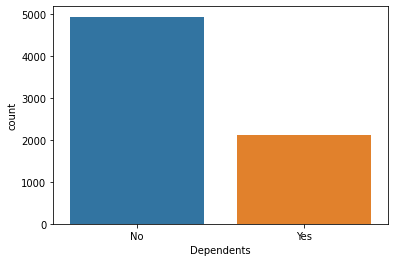

In [29]:
sns.countplot(x="Dependents",data=cc)

No Dependents data is higher tha Yes Dependents data.

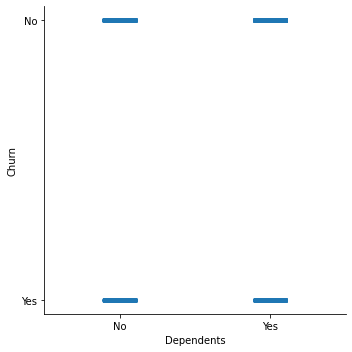

In [30]:
sns.catplot(x="Dependents",y="Churn",data=cc)

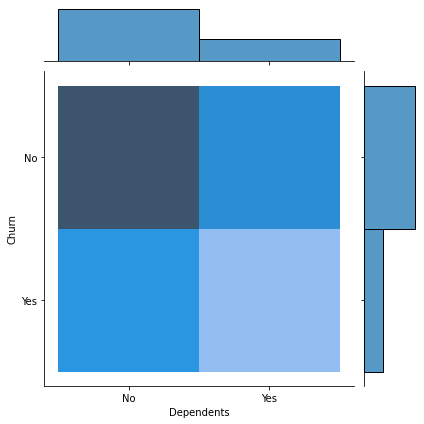

In [31]:
sns.jointplot(x="Dependents",y="Churn",data=cc,kind="hist")

No type of data is high in both column.

In [32]:
cc["tenure"].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

<AxesSubplot: xlabel='tenure', ylabel='Count'>

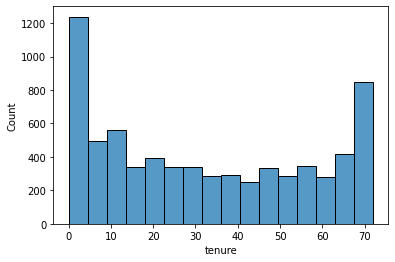

In [33]:
sns.histplot(cc["tenure"])

Data of tenure is not normally distributed.

<AxesSubplot: xlabel='tenure', ylabel='Churn'>

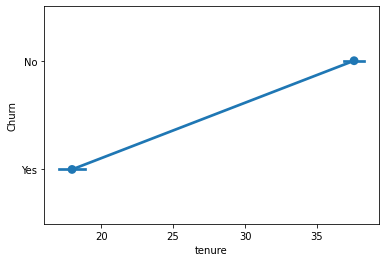

In [34]:
sns.pointplot(x="tenure",y="Churn",data=cc)

<AxesSubplot: xlabel='tenure', ylabel='Churn'>

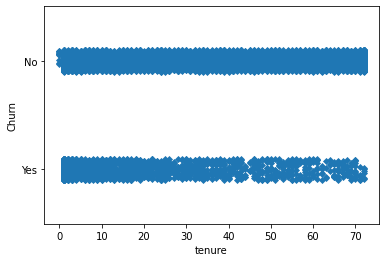

In [35]:
sns.stripplot(x="tenure",y="Churn",data=cc,marker="D")

NO data is high for tenure.

In [36]:
cc["PhoneService"].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

<AxesSubplot: xlabel='PhoneService', ylabel='count'>

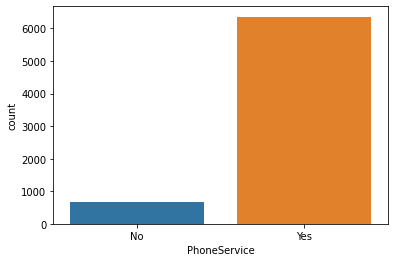

In [37]:
sns.countplot(x="PhoneService",data=cc)

PhoneService Yes data is higher.

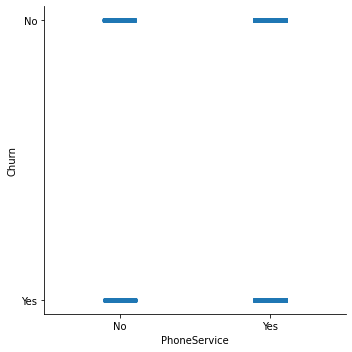

In [38]:
sns.catplot(x="PhoneService",y="Churn",data=cc)

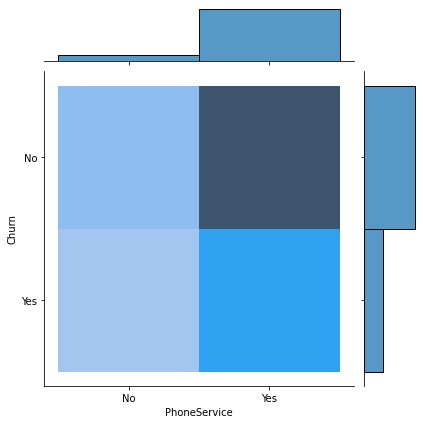

In [39]:
sns.jointplot(x="PhoneService",y="Churn",data=cc,kind="hist")

NO data is high for PhoneService.

In [40]:
cc["MultipleLines"].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

<AxesSubplot: xlabel='MultipleLines', ylabel='count'>

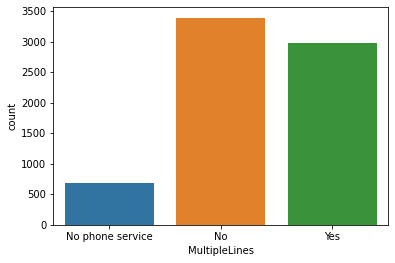

In [41]:
sns.countplot(x="MultipleLines",data=cc)

No type of MultipleLines data is higher than others.

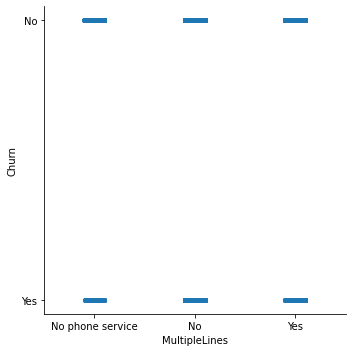

In [42]:
sns.catplot(x="MultipleLines",y="Churn",data=cc)

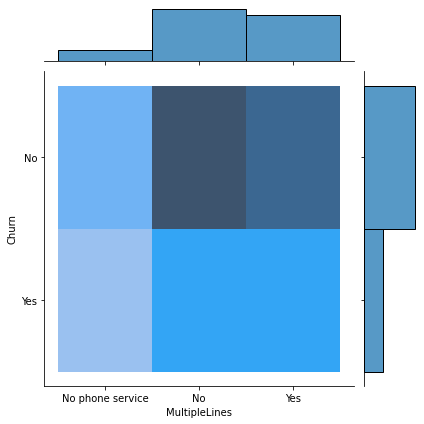

In [43]:
sns.jointplot(x="MultipleLines",y="Churn",data=cc,kind="hist")

NO Data is high for MultipleLines.

In [44]:
cc["InternetService"].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

<AxesSubplot: xlabel='InternetService', ylabel='count'>

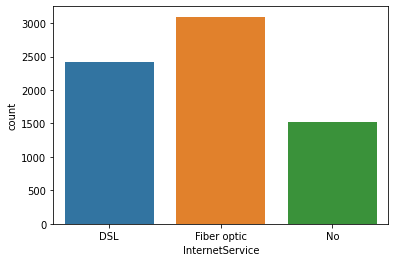

In [45]:
sns.countplot(x="InternetService",data=cc)

Fiber optic type is highest for InternetService.

<AxesSubplot: xlabel='InternetService', ylabel='Churn'>

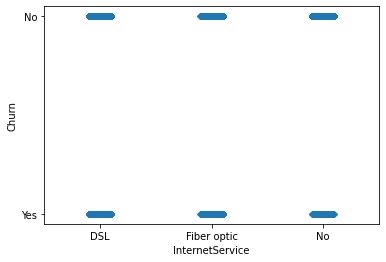

In [46]:
sns.stripplot(x="InternetService",y="Churn",data=cc,marker="D")

<AxesSubplot: xlabel='InternetService', ylabel='Churn'>

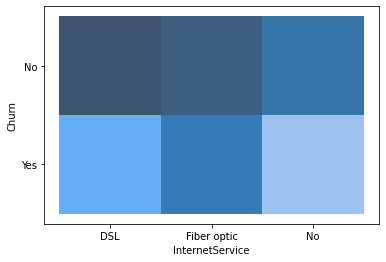

In [47]:
sns.histplot(x="InternetService",y="Churn",data=cc)

No data is high for InternetService.

In [48]:
cc["OnlineSecurity"].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

<AxesSubplot: xlabel='OnlineSecurity', ylabel='count'>

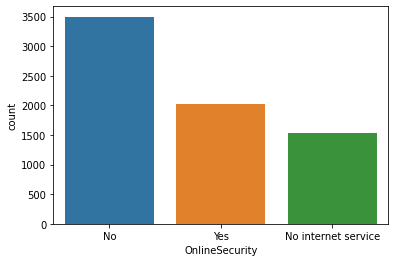

In [49]:
sns.countplot(x="OnlineSecurity",data=cc)

No OnlineSecurity is higher,it means 3498 people have no online security.

<AxesSubplot: xlabel='OnlineSecurity', ylabel='Churn'>

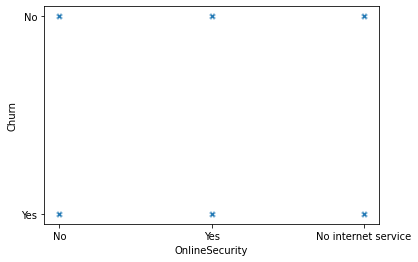

In [50]:
sns.scatterplot(x="OnlineSecurity",y="Churn",data=cc,marker="X")

<AxesSubplot: xlabel='OnlineSecurity', ylabel='Churn'>

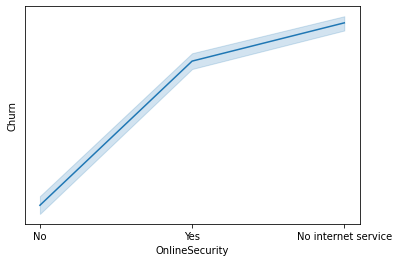

In [51]:
sns.lineplot(x="OnlineSecurity",y="Churn",data=cc)

No data is higher in No internet service.

In [52]:
cc["OnlineBackup"].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

<AxesSubplot: xlabel='OnlineBackup', ylabel='count'>

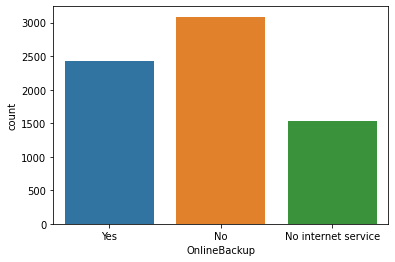

In [53]:
sns.countplot(x="OnlineBackup",data=cc)

NO OnlineBackup is higher.

<AxesSubplot: xlabel='OnlineBackup', ylabel='Churn'>

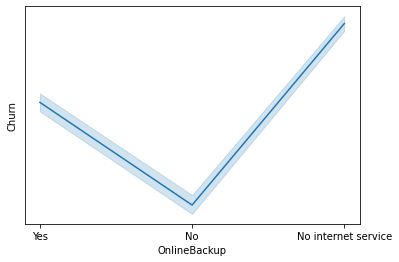

In [54]:
sns.lineplot(x="OnlineBackup",y="Churn",data=cc)

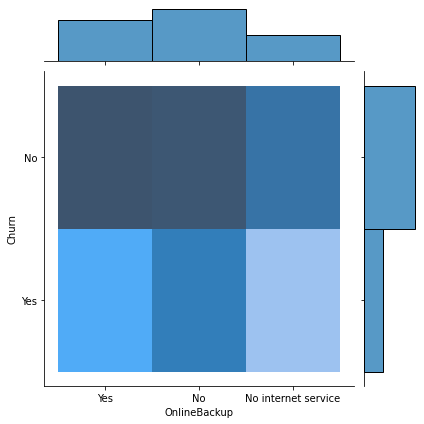

In [55]:
sns.jointplot(x="OnlineBackup",y="Churn",data=cc,kind="hist")

No data is high in OnlineBackup.

In [56]:
cc["DeviceProtection"].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

<AxesSubplot: xlabel='DeviceProtection', ylabel='count'>

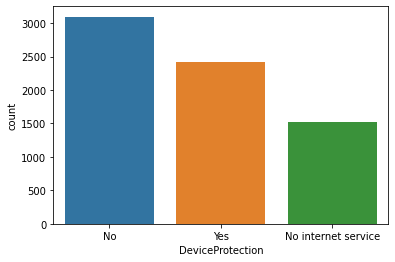

In [57]:
sns.countplot(x="DeviceProtection",data=cc)

NO DeviceProtection is higher.

<AxesSubplot: xlabel='DeviceProtection', ylabel='Churn'>

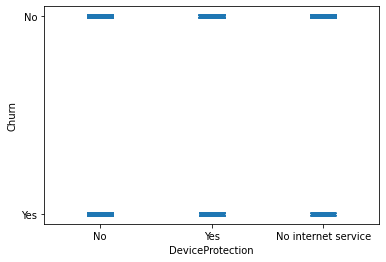

In [58]:
sns.stripplot(x="DeviceProtection",y="Churn",data=cc,marker="X")

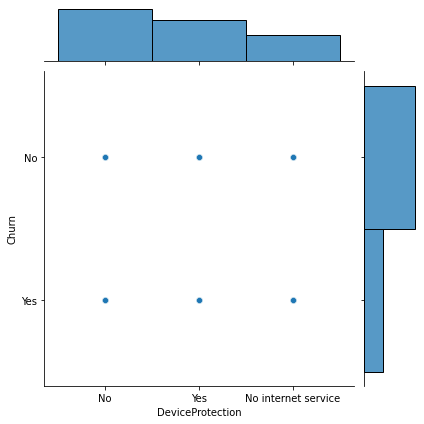

In [59]:
sns.jointplot(x="DeviceProtection",y="Churn",data=cc)

NO data is high for DeviceProtection.

In [60]:
cc["TechSupport"].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

<AxesSubplot: xlabel='TechSupport', ylabel='count'>

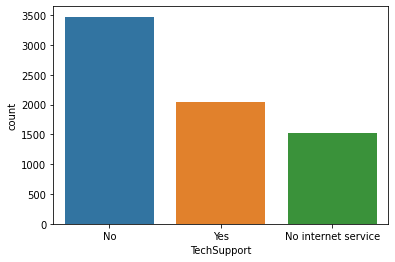

In [61]:
sns.countplot(x="TechSupport",data=cc)

No data is high for TechSupport,it means no technical support.

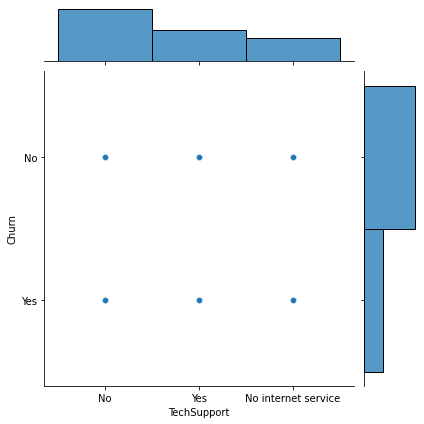

In [62]:
sns.jointplot(x="TechSupport",y="Churn",data=cc)

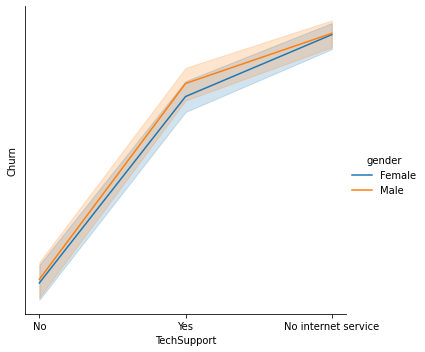

In [63]:
sns.relplot(x="TechSupport",y="Churn",data=cc,kind="line",hue="gender")

Yes Data is high for No internet service TechSupport for both Male and Female.

In [64]:
cc["StreamingTV"].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

<AxesSubplot: xlabel='StreamingTV', ylabel='count'>

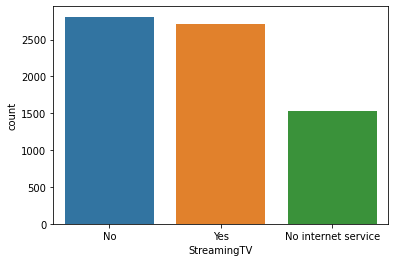

In [65]:
sns.countplot(x="StreamingTV",data=cc)

No and yes both have same data for StreamingTV.

<AxesSubplot: xlabel='StreamingTV', ylabel='Churn'>

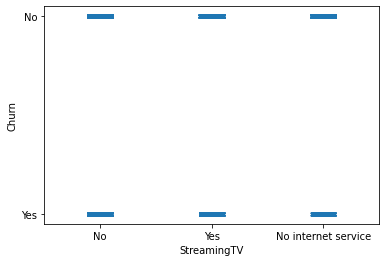

In [66]:
sns.stripplot(x="StreamingTV",y="Churn",data=cc,marker="X")

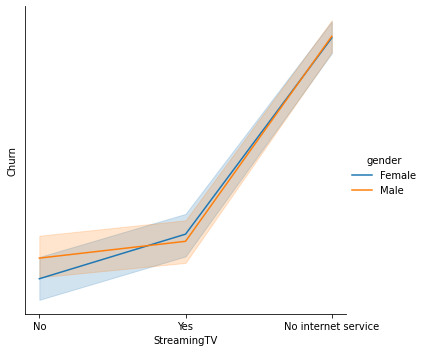

In [67]:
sns.relplot(x="StreamingTV",y="Churn",data=cc,kind="line",hue="gender")

No data is higher in No internet service for both Male and Female.

In [68]:
cc["StreamingMovies"].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

<AxesSubplot: xlabel='StreamingMovies', ylabel='count'>

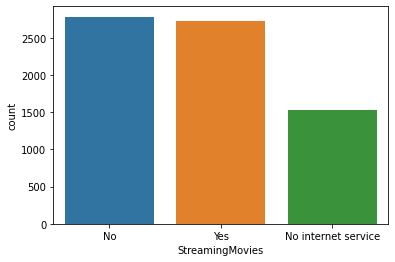

In [69]:
sns.countplot(x="StreamingMovies",data=cc)

No and yes both have same data for StreamingMovies.

<AxesSubplot: xlabel='StreamingMovies', ylabel='Churn'>

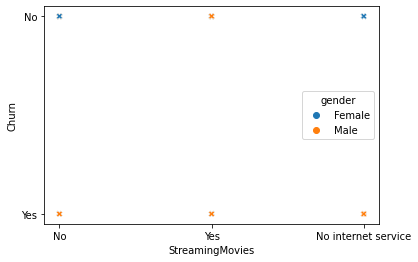

In [70]:
sns.scatterplot(x="StreamingMovies",y="Churn",data=cc,hue="gender",marker="X")

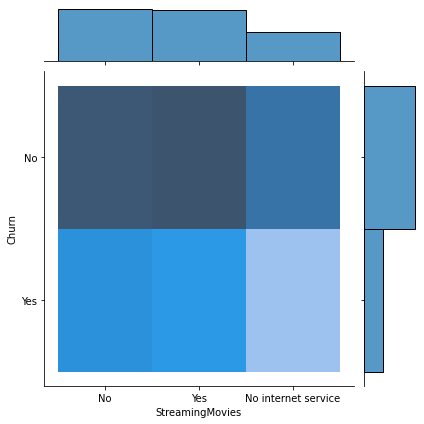

In [71]:
sns.jointplot(x="StreamingMovies",y="Churn",data=cc,kind="hist")

No data is higher for StreamingMovies.

In [72]:
cc["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

<AxesSubplot: xlabel='Contract', ylabel='count'>

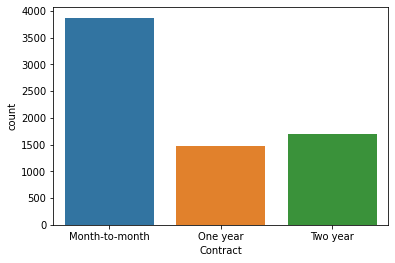

In [73]:
sns.countplot(x="Contract",data=cc)

Month-to-month data is higher for contract.

<AxesSubplot: xlabel='Contract', ylabel='Churn'>

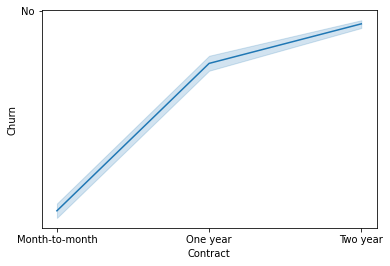

In [74]:
sns.lineplot(x="Contract",y="Churn",data=cc)

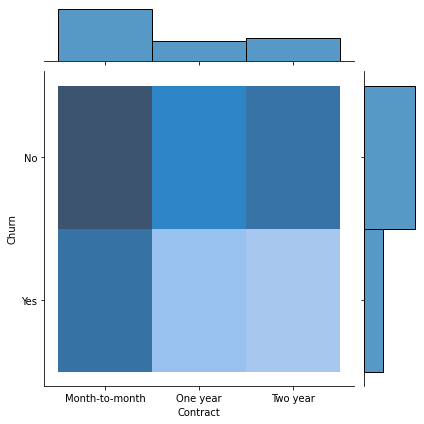

In [75]:
sns.jointplot(x="Contract",y="Churn",data=cc,kind="hist")

Yes and NO bath type of data in month-to-month.

In [76]:
cc["PaperlessBilling"].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

<AxesSubplot: xlabel='PaperlessBilling', ylabel='count'>

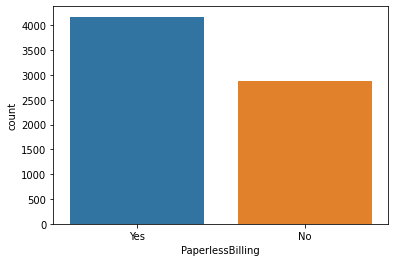

In [77]:
sns.countplot(x="PaperlessBilling",data=cc)

PaperlessBilling yes is higher.

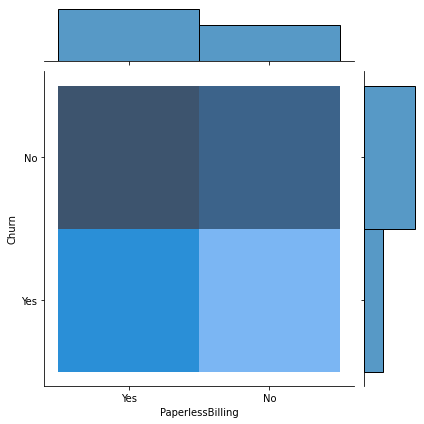

In [78]:
sns.jointplot(x="PaperlessBilling",y="Churn",data=cc,kind="hist")

No data is high in PaperlessBilling column.

In [79]:
cc["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

<AxesSubplot: xlabel='PaymentMethod', ylabel='count'>

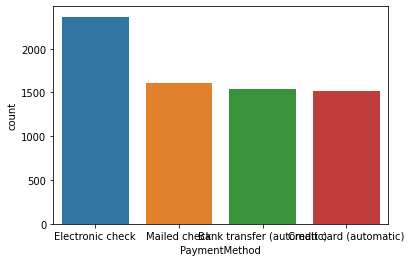

In [80]:
sns.countplot(x="PaymentMethod",data=cc)

Electronic check PaymentMethod data is higher.

<AxesSubplot: xlabel='PaymentMethod', ylabel='Churn'>

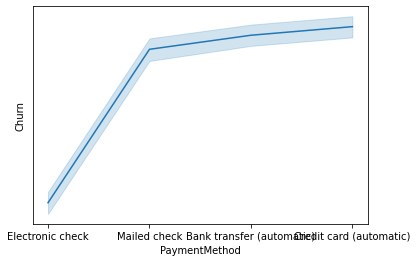

In [81]:
sns.lineplot(x="PaymentMethod",y="Churn",data=cc)

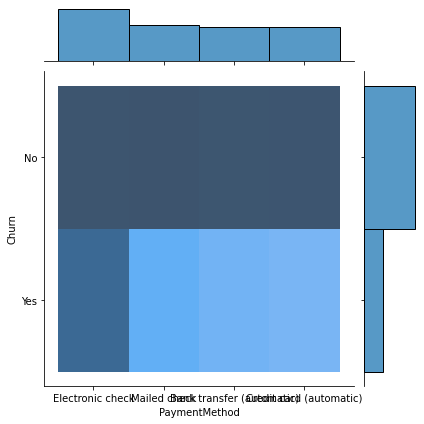

In [82]:
sns.jointplot(x="PaymentMethod",y="Churn",data=cc,kind="hist")

No and Yes data in Electronic,

No data is high in others column.

In [83]:
cc["MonthlyCharges"].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

<AxesSubplot: xlabel='MonthlyCharges', ylabel='Density'>

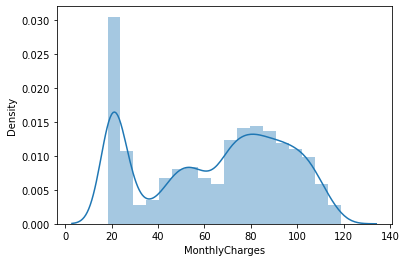

In [84]:
sns.distplot(cc["MonthlyCharges"])

MonthlyCharges data is not normally distributed.

<AxesSubplot: xlabel='MonthlyCharges', ylabel='Churn'>

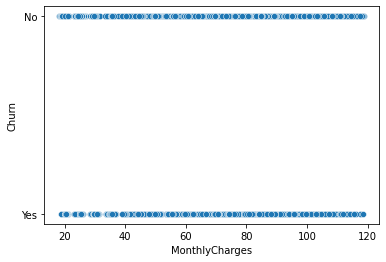

In [85]:
sns.scatterplot(x="MonthlyCharges",y="Churn",data=cc)

<AxesSubplot: xlabel='MonthlyCharges', ylabel='Churn'>

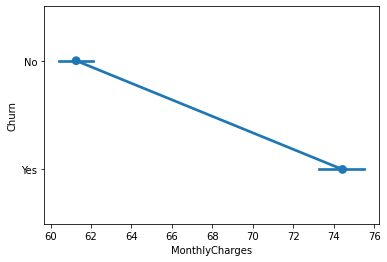

In [86]:
sns.pointplot(x="MonthlyCharges",y="Churn",data=cc)

No data is high in MonthlyCharges.

In [87]:
cc["TotalCharges"].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [88]:
cc["TotalCharges"].isnull().sum()

0

<AxesSubplot: xlabel='TotalCharges', ylabel='Count'>

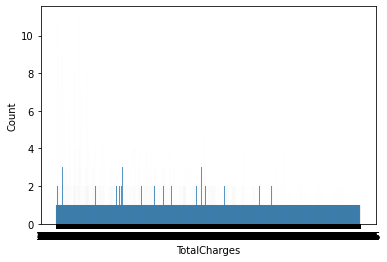

In [89]:
sns.histplot(cc["TotalCharges"])

<AxesSubplot: xlabel='TotalCharges', ylabel='Churn'>

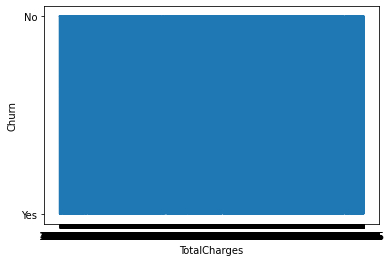

In [90]:
sns.lineplot(x="TotalCharges",y="Churn",data=cc)

Length of TotalCharges is very big, we should drop this column.

In [91]:
cc.drop("TotalCharges",axis=1,inplace=True)

In [92]:
cc.keys()

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn'],
      dtype='object')

In [93]:
cc.shape

(7043, 19)

TotalCharges column has been dropped.

In [94]:
cc["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot: xlabel='Churn', ylabel='count'>

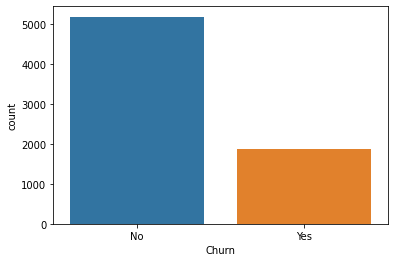

In [95]:
sns.countplot(x="Churn",data=cc)

NO data is higher for customer churn dataset.

# Lable Encoding

In [96]:
cc.head(2).T

,0,1
gender,Female,Male
SeniorCitizen,0,0
Partner,Yes,No
Dependents,No,No
tenure,1,34
PhoneService,No,Yes
MultipleLines,No phone service,No
InternetService,DSL,DSL
OnlineSecurity,No,Yes
OnlineBackup,Yes,No


In [97]:
from sklearn.preprocessing import LabelEncoder

In [98]:
le=LabelEncoder()
objects=["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection",
         "TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod","Churn"]

for i in objects:
    cc[i]=le.fit_transform(cc[i].astype(str))
    
objects

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [99]:
cc.tail().T

,7038,7039,7040,7041,7042
gender,1.0,0.0,0.0,1.0,1.00
SeniorCitizen,0.0,0.0,0.0,1.0,0.00
Partner,1.0,1.0,1.0,1.0,0.00
Dependents,1.0,1.0,1.0,0.0,0.00
tenure,24.0,72.0,11.0,4.0,66.00
PhoneService,1.0,1.0,0.0,1.0,1.00
MultipleLines,2.0,2.0,1.0,2.0,0.00
InternetService,0.0,1.0,0.0,1.0,1.00
OnlineSecurity,2.0,0.0,2.0,0.0,2.00
OnlineBackup,0.0,2.0,0.0,0.0,0.00


In [100]:
x=cc.drop("Churn",axis=1)
x.sample().T

,6079
gender,0.0
SeniorCitizen,0.0
Partner,1.0
Dependents,0.0
tenure,25.0
PhoneService,1.0
MultipleLines,2.0
InternetService,0.0
OnlineSecurity,0.0
OnlineBackup,2.0


In [101]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


All object type independent variable has been encoded.

# Chacking The skewness

In [102]:
cc.skew().sort_values(ascending=False)

SeniorCitizen       1.833633
Churn               1.063031
Dependents          0.875199
Contract            0.630959
OnlineSecurity      0.416985
TechSupport         0.402365
tenure              0.239540
InternetService     0.205423
DeviceProtection    0.186847
OnlineBackup        0.182930
MultipleLines       0.118719
Partner             0.067922
StreamingTV         0.028486
StreamingMovies     0.014657
gender             -0.019031
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
PaperlessBilling   -0.375396
PhoneService       -2.727153
dtype: float64

No High skewness is present in Customer Churn dataset.

<AxesSubplot: xlabel='SeniorCitizen', ylabel='Density'>

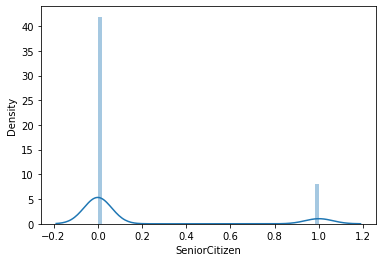

In [103]:
sns.distplot(cc["SeniorCitizen"])

No skewness present in seniorcitizen column.

<AxesSubplot: xlabel='Churn', ylabel='Density'>

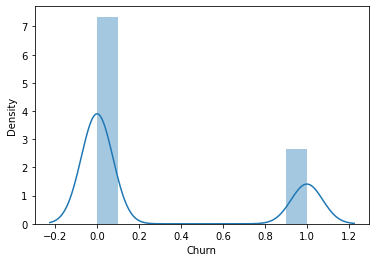

In [104]:
sns.distplot(cc["Churn"])

No skewness is present in Churn column.

<AxesSubplot: xlabel='Dependents', ylabel='Density'>

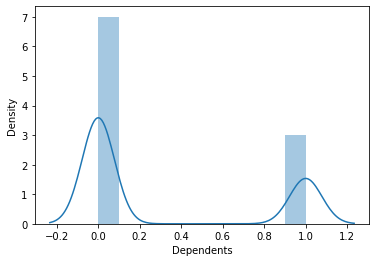

In [105]:
sns.distplot(cc["Dependents"])

No skewness is present in Dependents Column.

<AxesSubplot: xlabel='Contract', ylabel='Density'>

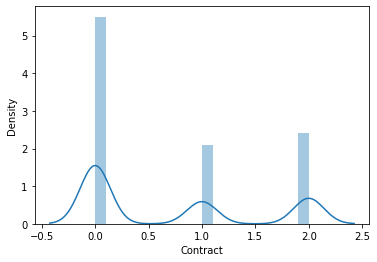

In [106]:
sns.distplot(cc["Contract"])

No skewness is present in Contract column.

<AxesSubplot: xlabel='OnlineSecurity', ylabel='Density'>

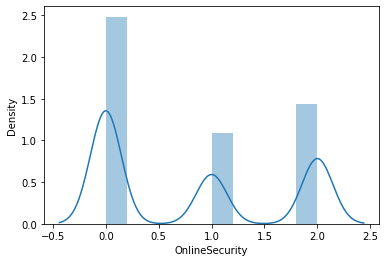

In [107]:
sns.distplot(cc["OnlineSecurity"])

No skewness is present OnlineSecurity.

<AxesSubplot: xlabel='TechSupport', ylabel='Density'>

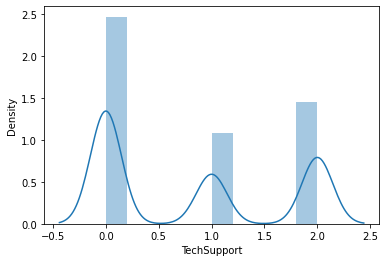

In [108]:
sns.distplot(cc["TechSupport"])

No skewness is present in TectSupport.

<AxesSubplot: xlabel='tenure', ylabel='Density'>

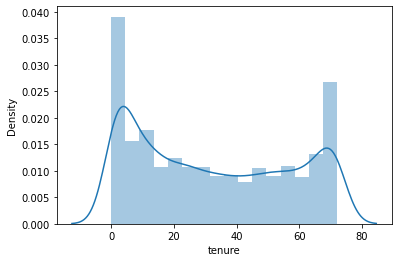

In [109]:
sns.distplot(cc["tenure"])

No skewness is present in tenure column.

<AxesSubplot: xlabel='InternetService', ylabel='Density'>

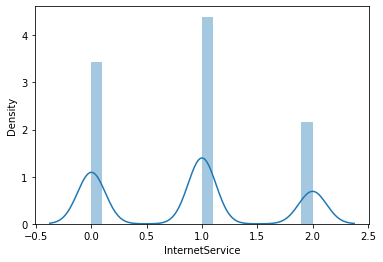

In [110]:
sns.distplot(cc["InternetService"])

No skewness is present in Internetservice column.

<AxesSubplot: xlabel='DeviceProtection', ylabel='Density'>

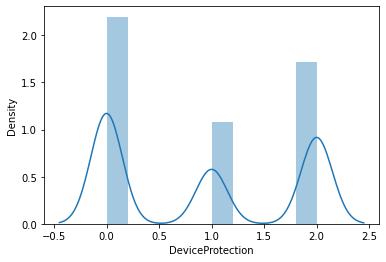

In [111]:
sns.distplot(cc["DeviceProtection"])

No skewness is present in DeviceProtection column.

<AxesSubplot: xlabel='OnlineBackup', ylabel='Density'>

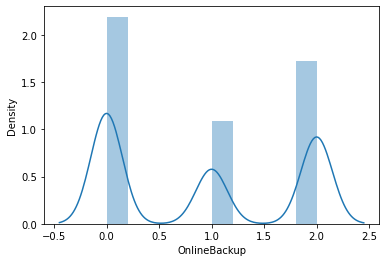

In [112]:
sns.distplot(cc["OnlineBackup"])

No skewness is present in Onlinebackup column.

<AxesSubplot: xlabel='MultipleLines', ylabel='Density'>

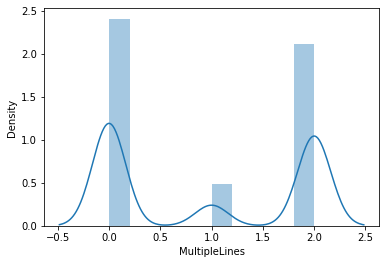

In [113]:
sns.distplot(cc["MultipleLines"])

No skewness is present in MultipleLines.

<AxesSubplot: xlabel='Partner', ylabel='Density'>

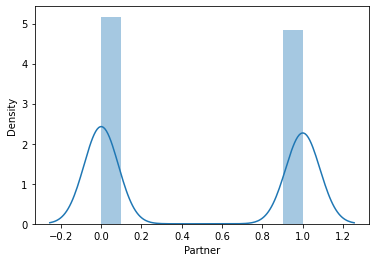

In [114]:
sns.distplot(cc["Partner"])

No skewness is present in Partner.

<AxesSubplot: xlabel='StreamingTV', ylabel='Density'>

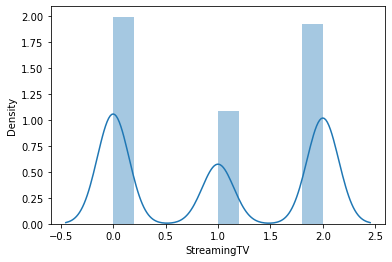

In [115]:
sns.distplot(cc["StreamingTV"])

No skewness is present in StreamingTV.

<AxesSubplot: xlabel='StreamingMovies', ylabel='Density'>

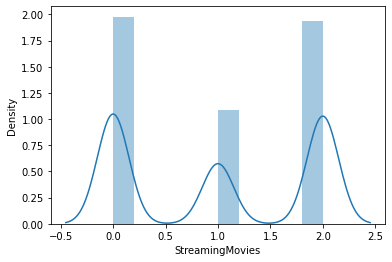

In [116]:
sns.distplot(cc["StreamingMovies"])

No skewness is present in StreamingMovies.

<AxesSubplot: xlabel='gender', ylabel='Density'>

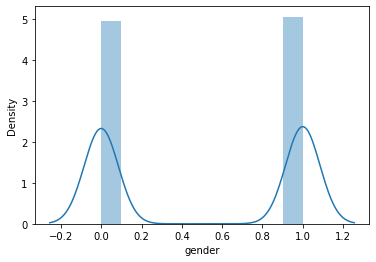

In [117]:
sns.distplot(cc["gender"])

No skewness is present in gender.

<AxesSubplot: xlabel='PaymentMethod', ylabel='Density'>

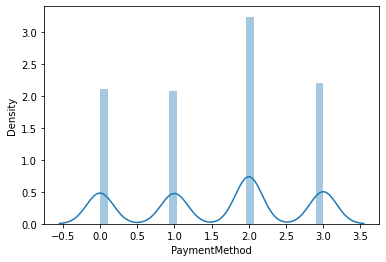

In [118]:
sns.distplot(cc["PaymentMethod"])

No skewness is present in paymentMethod.

<AxesSubplot: xlabel='MonthlyCharges', ylabel='Density'>

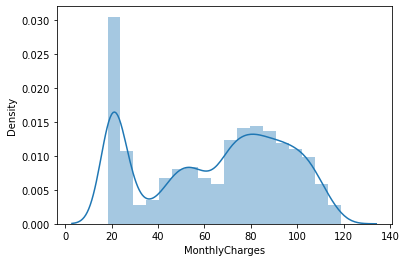

In [119]:
sns.distplot(cc["MonthlyCharges"])

No skewness is present in Monthlycharge.

<AxesSubplot: xlabel='PaperlessBilling', ylabel='Density'>

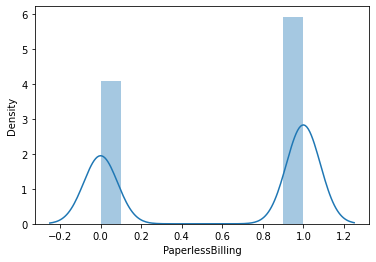

In [120]:
sns.distplot(cc["PaperlessBilling"])

No skewness is present in PaperlessBilling.

<AxesSubplot: xlabel='PhoneService', ylabel='Density'>

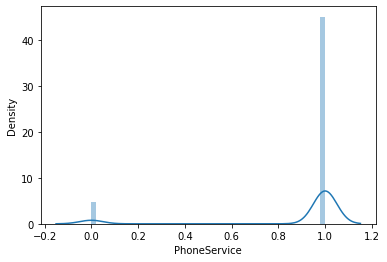

In [121]:
sns.distplot(cc["PhoneService"])

No skewness is present in Phoneservice.

# Checking Outliers

gender                 AxesSubplot(0.125,0.657941;0.0945122x0.222059)
SeniorCitizen       AxesSubplot(0.238415,0.657941;0.0945122x0.222059)
Partner             AxesSubplot(0.351829,0.657941;0.0945122x0.222059)
Dependents          AxesSubplot(0.465244,0.657941;0.0945122x0.222059)
tenure              AxesSubplot(0.578659,0.657941;0.0945122x0.222059)
PhoneService        AxesSubplot(0.692073,0.657941;0.0945122x0.222059)
MultipleLines       AxesSubplot(0.805488,0.657941;0.0945122x0.222059)
InternetService        AxesSubplot(0.125,0.391471;0.0945122x0.222059)
OnlineSecurity      AxesSubplot(0.238415,0.391471;0.0945122x0.222059)
OnlineBackup        AxesSubplot(0.351829,0.391471;0.0945122x0.222059)
DeviceProtection    AxesSubplot(0.465244,0.391471;0.0945122x0.222059)
TechSupport         AxesSubplot(0.578659,0.391471;0.0945122x0.222059)
StreamingTV         AxesSubplot(0.692073,0.391471;0.0945122x0.222059)
StreamingMovies     AxesSubplot(0.805488,0.391471;0.0945122x0.222059)
Contract            

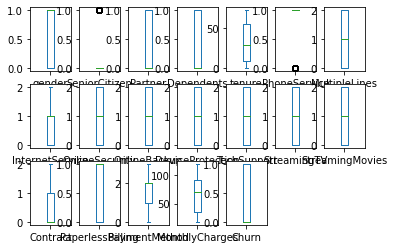

In [122]:
cc.plot(kind="box",subplots=True,layout=(3,7))

some outliers are present in Chustomer Churn dataset.

Removing The Skewness.

In [123]:
from scipy.stats import zscore

In [124]:
new_data=np.array(cc)

In [125]:
new_data

array([[  0.  ,   0.  ,   1.  , ...,   2.  ,  29.85,   0.  ],
       [  1.  ,   0.  ,   0.  , ...,   3.  ,  56.95,   0.  ],
       [  1.  ,   0.  ,   0.  , ...,   3.  ,  53.85,   1.  ],
       ...,
       [  0.  ,   0.  ,   1.  , ...,   2.  ,  29.6 ,   0.  ],
       [  1.  ,   1.  ,   1.  , ...,   3.  ,  74.4 ,   1.  ],
       [  1.  ,   0.  ,   0.  , ...,   0.  , 105.65,   0.  ]])

In [126]:
z=np.abs(zscore(cc))
z

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,1.009559,0.439916,1.034530,0.654012,1.277445,3.054010,0.062723,1.183234,0.918838,1.242550,1.027910,0.925262,1.113495,1.121405,0.828207,0.829798,0.398558,1.160323,0.601023
1,0.990532,0.439916,0.966622,0.654012,0.066327,0.327438,0.991588,1.183234,1.407321,1.029919,1.245111,0.925262,1.113495,1.121405,0.371271,1.205113,1.334863,0.259629,0.601023
2,0.990532,0.439916,0.966622,0.654012,1.236724,0.327438,0.991588,1.183234,1.407321,1.242550,1.027910,0.925262,1.113495,1.121405,0.828207,0.829798,1.334863,0.362660,1.663829
3,0.990532,0.439916,0.966622,0.654012,0.514251,3.054010,0.062723,1.183234,1.407321,1.029919,1.245111,1.396299,1.113495,1.121405,0.371271,1.205113,1.474052,0.746535,0.601023
4,1.009559,0.439916,0.966622,0.654012,1.236724,0.327438,0.991588,0.172250,0.918838,1.029919,1.027910,0.925262,1.113495,1.121405,0.828207,0.829798,0.398558,0.197365,1.663829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,0.439916,1.034530,1.529024,0.340876,0.327438,1.117034,1.183234,1.407321,1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.601023
7039,1.009559,0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,0.918838,1.242550,1.245111,0.925262,1.146547,1.138411,0.371271,0.829798,0.537747,1.277533,0.601023
7040,1.009559,0.439916,1.034530,1.529024,0.870241,3.054010,0.062723,1.183234,1.407321,1.029919,1.027910,0.925262,1.113495,1.121405,0.828207,0.829798,0.398558,1.168632,0.601023
7041,0.990532,2.273159,1.034530,0.654012,1.155283,0.327438,1.117034,0.172250,0.918838,1.029919,1.027910,0.925262,1.113495,1.121405,0.828207,0.829798,1.334863,0.320338,1.663829


In [127]:
thereshold=3
print(np.where(z>3))

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
       1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
       1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
       1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
       1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
       1614, 1620, 1634, 1637, 1652, 1689, 1692, 1

In [128]:
new_data=cc[(z<3).all(axis=1)]
new_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,0,0,0,72,1,0,2,1,1,1,1,1,1,2,1,0,21.15,0
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,1


In [129]:
new_data.shape

(6361, 19)

In [130]:
cc.shape

(7043, 19)

# 682 outliers has been removed.

In [131]:
cc=new_data
cc.sample()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
1545,1,0,0,0,63,1,2,1,0,2,2,0,2,2,2,1,0,104.75,0


In [132]:
x=cc.drop("Churn",axis=1)

In [133]:
x.tail(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40
7042,1,0,0,0,66,1,0,1,2,0,2,2,2,2,2,1,0,105.65


# MULTICOLLINEARITY WITH VARIANCE INFLATION FACTOR

In [134]:
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [135]:
def vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [136]:
vif(x)

,variables,VIF FACTOR
0,gender,1.002004
1,SeniorCitizen,1.152457
2,Partner,1.469602
3,Dependents,1.386423
4,tenure,2.831991
5,PhoneService,24.085902
6,MultipleLines,1.414143
7,InternetService,1.581417
8,OnlineSecurity,1.247462
9,OnlineBackup,1.197778


No high multicollinearty in Customer churn dataset.

# Scaling The data

In [137]:
from sklearn.preprocessing import StandardScaler

In [138]:
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 0.99263832, -0.44159123, -0.97224479, ..., -1.21176486,
         1.33544287, -0.33661675],
       [ 0.99263832, -0.44159123, -0.97224479, ...,  0.82524261,
         1.33544287, -0.43843231],
       [-1.00741628, -0.44159123, -0.97224479, ...,  0.82524261,
         0.39969137,  0.11498455],
       ...,
       [-1.00741628, -0.44159123,  1.02854755, ...,  0.82524261,
        -0.53606013,  1.18240581],
       [ 0.99263832,  2.26453771,  1.02854755, ...,  0.82524261,
         1.33544287,  0.23650636],
       [ 0.99263832, -0.44159123, -0.97224479, ...,  0.82524261,
        -1.47181163,  1.26287295]])

Dataset has been scaled.

# Prediction by the algorithm

In [139]:
from sklearn.model_selection import train_test_split

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [140]:
cc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,0


In [141]:
x=cc.drop("Churn",axis=1)

In [142]:
x.sample()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
6862,0,1,0,0,4,1,2,1,0,0,2,0,0,2,0,1,2,88.85


In [143]:
y=cc["Churn"]

In [144]:
y.sample()

4627    0
Name: Churn, dtype: int32

In [145]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=41)

In [146]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4452, 18)
(1909, 18)
(4452,)
(1909,)


In [147]:
gp=GaussianProcessClassifier()
gp.fit(x_train,y_train)
gppred=gp.predict(x_test)
print(accuracy_score(y_test,gppred)*100)
print(classification_report(y_test,gppred))
print(confusion_matrix(y_test,gppred))

77.63226820324778
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1409
           1       0.57      0.57      0.57       500

    accuracy                           0.78      1909
   macro avg       0.71      0.71      0.71      1909
weighted avg       0.78      0.78      0.78      1909

[[1198  211]
 [ 216  284]]


In [148]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfcpred=rfc.predict(x_test)
print(accuracy_score(y_test,rfcpred)*100)
print(classification_report(y_test,rfcpred))
print(confusion_matrix(y_test,rfcpred))

81.08957569408068
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1409
           1       0.68      0.52      0.59       500

    accuracy                           0.81      1909
   macro avg       0.76      0.72      0.73      1909
weighted avg       0.80      0.81      0.80      1909

[[1286  123]
 [ 238  262]]


In [149]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtcpred=dtc.predict(x_test)
print(accuracy_score(y_test,dtcpred)*100)
print(classification_report(y_test,dtcpred))
print(confusion_matrix(y_test,dtcpred))

75.2226296490309
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1409
           1       0.53      0.53      0.53       500

    accuracy                           0.75      1909
   macro avg       0.68      0.68      0.68      1909
weighted avg       0.75      0.75      0.75      1909

[[1169  240]
 [ 233  267]]


In [150]:
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
kncpred=knc.predict(x_test)
print(accuracy_score(y_test,kncpred)*100)
print(classification_report(y_test,kncpred))
print(confusion_matrix(y_test,kncpred))

77.78941854374017
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1409
           1       0.58      0.57      0.57       500

    accuracy                           0.78      1909
   macro avg       0.71      0.71      0.71      1909
weighted avg       0.78      0.78      0.78      1909

[[1200  209]
 [ 215  285]]


In [151]:
svc=SVC()
svc.fit(x_train,y_train)
svcpred=svc.predict(x_test)
print(accuracy_score(y_test,svcpred)*100)
print(classification_report(y_test,svcpred))
print(confusion_matrix(y_test,svcpred))

81.66579360921948
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1409
           1       0.74      0.47      0.57       500

    accuracy                           0.82      1909
   macro avg       0.78      0.70      0.73      1909
weighted avg       0.81      0.82      0.80      1909

[[1326   83]
 [ 267  233]]


SVC is the best algorithm for Customer Churn dataset.

# AUC-ROC CURVE

In [154]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [155]:
y_pred_prob=gp.predict_proba(x_test)[:,1]
y_pred_prob

array([0.50871964, 0.49759268, 0.55622   , ..., 0.50167105, 0.76160317,
       0.46386748])

In [156]:
fbr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [157]:
fbr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.09723208e-04,
       7.09723208e-04, 7.09723208e-04, 7.09723208e-04, 1.41944642e-03,
       1.41944642e-03, 2.12916962e-03, 2.12916962e-03, 2.12916962e-03,
       2.12916962e-03, 2.83889283e-03, 2.83889283e-03, 4.25833925e-03,
       4.25833925e-03, 4.96806246e-03, 4.96806246e-03, 6.38750887e-03,
       6.38750887e-03, 7.09723208e-03, 7.09723208e-03, 7.80695529e-03,
       7.80695529e-03, 8.51667850e-03, 8.51667850e-03, 9.22640170e-03,
       9.22640170e-03, 9.93612491e-03, 9.93612491e-03, 1.13555713e-02,
       1.13555713e-02, 1.27750177e-02, 1.27750177e-02, 1.41944642e-02,
       1.41944642e-02, 1.56139106e-02, 1.56139106e-02, 1.63236338e-02,
       1.63236338e-02, 1.70333570e-02, 1.70333570e-02, 1.77430802e-02,
       1.77430802e-02, 1.84528034e-02, 1.84528034e-02, 1.98722498e-02,
       1.98722498e-02, 2.05819730e-02, 2.05819730e-02, 2.12916962e-02,
       2.12916962e-02, 2.34208659e-02, 2.34208659e-02, 2.41305891e-02,
      

In [158]:
tpr

array([0.   , 0.002, 0.028, 0.028, 0.044, 0.048, 0.062, 0.062, 0.09 ,
       0.09 , 0.098, 0.102, 0.12 , 0.12 , 0.122, 0.122, 0.132, 0.132,
       0.136, 0.136, 0.138, 0.138, 0.14 , 0.14 , 0.15 , 0.15 , 0.154,
       0.154, 0.158, 0.158, 0.162, 0.162, 0.166, 0.166, 0.174, 0.174,
       0.178, 0.178, 0.184, 0.184, 0.186, 0.186, 0.188, 0.188, 0.192,
       0.192, 0.196, 0.196, 0.198, 0.198, 0.214, 0.214, 0.224, 0.224,
       0.25 , 0.25 , 0.252, 0.252, 0.254, 0.254, 0.262, 0.262, 0.266,
       0.266, 0.278, 0.278, 0.286, 0.286, 0.296, 0.296, 0.298, 0.298,
       0.304, 0.304, 0.322, 0.322, 0.328, 0.328, 0.332, 0.332, 0.334,
       0.334, 0.342, 0.342, 0.356, 0.356, 0.36 , 0.36 , 0.364, 0.364,
       0.368, 0.368, 0.37 , 0.37 , 0.372, 0.372, 0.376, 0.376, 0.394,
       0.394, 0.398, 0.398, 0.4  , 0.4  , 0.402, 0.402, 0.404, 0.404,
       0.406, 0.406, 0.412, 0.412, 0.416, 0.416, 0.422, 0.422, 0.424,
       0.424, 0.426, 0.426, 0.428, 0.428, 0.434, 0.434, 0.438, 0.438,
       0.442, 0.442,

In [159]:
thresholds

array([1.76160317, 0.76160317, 0.68758325, 0.68153235, 0.66606202,
       0.66450993, 0.6564084 , 0.65253301, 0.63065012, 0.63052517,
       0.62534442, 0.62342918, 0.60126931, 0.60073327, 0.60069307,
       0.59899303, 0.58728466, 0.58596739, 0.58234907, 0.58178415,
       0.58050786, 0.57988227, 0.5790471 , 0.57797135, 0.5747524 ,
       0.5742704 , 0.57233471, 0.57153   , 0.57016343, 0.56915097,
       0.56580944, 0.56223356, 0.56171437, 0.55663744, 0.55483205,
       0.55292603, 0.54687388, 0.5458059 , 0.54522029, 0.5450427 ,
       0.54470976, 0.54455908, 0.54440457, 0.54422693, 0.54391544,
       0.54299913, 0.54153181, 0.54051502, 0.53996234, 0.53910662,
       0.53500442, 0.53486044, 0.53325927, 0.5316296 , 0.52865307,
       0.52829125, 0.52801684, 0.5280002 , 0.52779679, 0.52772671,
       0.5266318 , 0.52557904, 0.52515196, 0.52475513, 0.5233809 ,
       0.52327189, 0.52224536, 0.52172435, 0.52091507, 0.51914658,
       0.51913282, 0.51892331, 0.51844871, 0.51841886, 0.51629

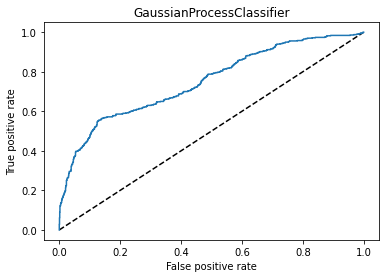

In [160]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fbr,tpr,label='GaussianProcessClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GaussianProcessClassifier')
plt.show()

In [162]:
auc_score=roc_auc_score(y_test,gp.predict(x_test))

In [163]:
auc_score

0.7091242015613911

In [164]:
y_pred_prob=rfc.predict_proba(x_test)[:,1]
y_pred_prob

array([0.58, 0.64, 0.35, ..., 0.74, 0.98, 0.01])

In [165]:
fbr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [166]:
fbr

array([0.        , 0.        , 0.        , 0.        , 0.00141945,
       0.00212917, 0.00212917, 0.00212917, 0.00354862, 0.00354862,
       0.00354862, 0.00425834, 0.00567779, 0.00567779, 0.00709723,
       0.00709723, 0.00780696, 0.00851668, 0.0092264 , 0.01064585,
       0.01064585, 0.01206529, 0.01277502, 0.01277502, 0.01277502,
       0.01277502, 0.01277502, 0.01348474, 0.01348474, 0.01490419,
       0.01490419, 0.01632363, 0.01632363, 0.01703336, 0.01774308,
       0.01916253, 0.01987225, 0.0212917 , 0.02625976, 0.02767921,
       0.02767921, 0.02909865, 0.02980837, 0.03122782, 0.03193754,
       0.03264727, 0.03264727, 0.03477644, 0.03548616, 0.03548616,
       0.03690561, 0.03903478, 0.04329312, 0.04400284, 0.04755145,
       0.04968062, 0.05393896, 0.05748758, 0.0610362 , 0.0610362 ,
       0.06245564, 0.06245564, 0.06387509, 0.06955287, 0.0702626 ,
       0.07239177, 0.07381121, 0.07452094, 0.07452094, 0.07665011,
       0.08090845, 0.08729595, 0.08729595, 0.09084457, 0.09581

In [167]:
tpr

array([0.   , 0.002, 0.006, 0.012, 0.02 , 0.024, 0.03 , 0.038, 0.042,
       0.044, 0.052, 0.056, 0.072, 0.076, 0.084, 0.088, 0.096, 0.106,
       0.12 , 0.132, 0.136, 0.148, 0.148, 0.158, 0.164, 0.174, 0.176,
       0.186, 0.188, 0.198, 0.2  , 0.21 , 0.222, 0.224, 0.232, 0.238,
       0.244, 0.254, 0.262, 0.274, 0.276, 0.276, 0.284, 0.3  , 0.3  ,
       0.306, 0.308, 0.316, 0.316, 0.318, 0.342, 0.358, 0.376, 0.386,
       0.404, 0.426, 0.43 , 0.446, 0.456, 0.458, 0.468, 0.47 , 0.47 ,
       0.478, 0.478, 0.488, 0.488, 0.488, 0.49 , 0.512, 0.514, 0.522,
       0.524, 0.542, 0.55 , 0.552, 0.552, 0.57 , 0.574, 0.588, 0.588,
       0.6  , 0.6  , 0.616, 0.62 , 0.622, 0.632, 0.632, 0.642, 0.642,
       0.656, 0.662, 0.664, 0.672, 0.672, 0.682, 0.696, 0.704, 0.716,
       0.72 , 0.72 , 0.722, 0.73 , 0.74 , 0.74 , 0.762, 0.764, 0.77 ,
       0.77 , 0.776, 0.778, 0.79 , 0.798, 0.806, 0.808, 0.812, 0.822,
       0.83 , 0.836, 0.836, 0.842, 0.842, 0.85 , 0.85 , 0.858, 0.858,
       0.86 , 0.868,

In [168]:
thresholds

array([2.        , 1.        , 0.99      , 0.98      , 0.97      ,
       0.96      , 0.95      , 0.94      , 0.91      , 0.9075    ,
       0.9       , 0.89      , 0.88      , 0.87333333, 0.87      ,
       0.865     , 0.86      , 0.85      , 0.84      , 0.83      ,
       0.825     , 0.82      , 0.81283333, 0.81      , 0.80316667,
       0.8       , 0.795     , 0.79      , 0.78083333, 0.78      ,
       0.775     , 0.77      , 0.76      , 0.75666667, 0.75      ,
       0.74      , 0.73      , 0.72      , 0.71      , 0.7       ,
       0.698     , 0.69333333, 0.69      , 0.68      , 0.675     ,
       0.67      , 0.66166667, 0.66      , 0.65666667, 0.65591667,
       0.65      , 0.64      , 0.63      , 0.62      , 0.61      ,
       0.6       , 0.59      , 0.58      , 0.57      , 0.5675    ,
       0.56      , 0.55654762, 0.55333333, 0.55      , 0.545     ,
       0.54      , 0.53866667, 0.5325    , 0.53066667, 0.53      ,
       0.52      , 0.51      , 0.50483333, 0.5       , 0.49   

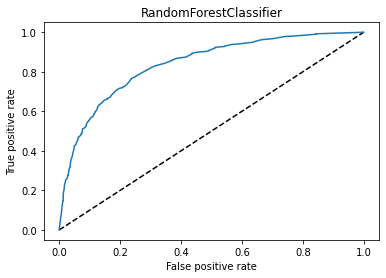

In [169]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fbr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()

In [170]:
auc_score=roc_auc_score(y_test,rfc.predict(x_test))

In [171]:
auc_score

0.7183520227111426

In [172]:
y_pred_prob=dtc.predict_proba(x_test)[:,1]
y_pred_prob

array([0., 0., 1., ..., 1., 1., 0.])

In [173]:
fbr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [174]:
print(fbr)
print(tpr)
print(thresholds)

[0.         0.17033357 0.17033357 0.17317246 0.17388219 1.        ]
[0.    0.53  0.534 0.536 0.536 1.   ]
[2.         1.         0.66666667 0.5        0.33333333 0.        ]


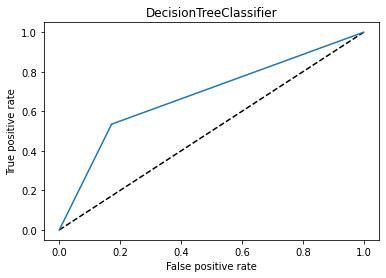

In [175]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fbr,tpr,label='DecisionTreeClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.show()

In [176]:
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
auc_score

0.681833215046132

In [177]:
y_pred_prob=knc.predict_proba(x_test)[:,1]
y_pred_prob

array([0.8, 0.2, 0.6, ..., 1. , 0.8, 0. ])

In [178]:
fbr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [179]:
print(fbr)
print(tpr)
print(thresholds)

[0.         0.00780696 0.05464869 0.14833215 0.28246984 0.47906317
 1.        ]
[0.    0.092 0.3   0.57  0.788 0.906 1.   ]
[2.  1.  0.8 0.6 0.4 0.2 0. ]


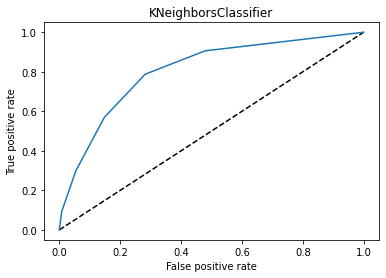

In [180]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fbr,tpr,label='KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighborsClassifier')
plt.show()

In [181]:
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
auc_score

0.681833215046132

# CROSS VAL SCORE

In [152]:
from sklearn.model_selection import cross_val_score

In [183]:
score=cross_val_score(gp,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.74626866 0.76965409 0.74213836 0.75314465 0.76886792]
0.7560147376325916
0.011375530664706406


In [184]:
score=cross_val_score(rfc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.79261587 0.7759434  0.77672956 0.79009434 0.7908805 ]
0.7852527333540835
0.007329896893878963


In [185]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.72191673 0.73113208 0.73349057 0.72012579 0.73427673]
0.7281883778723068
0.005969681843490386


In [186]:
score=cross_val_score(knc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.76276512 0.79638365 0.75707547 0.76100629 0.78616352]
0.7726788105154465
0.01563169800833186


In [187]:
score=cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.80754124 0.7908805  0.78066038 0.79166667 0.79795597]
0.7937409526350373
0.008852125832667269


# Hyper Parameter Tuning

In [188]:
from sklearn.model_selection import GridSearchCV

In [207]:
p1={"n_restarts_optimizer":[0,1,2,3],"max_iter_predict":[100,200,300],"warm_start":[True,False],"copy_X_train":[True,False]}

Not interrupting.

In [194]:
p2={"n_estimators":[100,200,300],"criterion":["gini","entropy","log_loss"],"class_weight":["balanced","balanced_subsample",None],"max_samples":[None,1,2.1,2.0]}

In [196]:
gd=GridSearchCV(estimator=rfc,param_grid=p2,cv=5)
gd.fit(x,y)
print(gd.best_params_)
print(gd.best_score_)

{'class_weight': None, 'criterion': 'entropy', 'max_samples': None, 'n_estimators': 200}
0.7909110109828218


In [197]:
rfc=RandomForestClassifier(class_weight=None,criterion="entropy",max_samples=None,n_estimators=200)
rfc.fit(x_train,y_train)
rfcpred=rfc.predict(x_test)
print(accuracy_score(y_test,rfcpred)*100)
print(classification_report(y_test,rfcpred))
print(confusion_matrix(y_test,rfcpred))

80.98480880041907
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1409
           1       0.68      0.51      0.58       500

    accuracy                           0.81      1909
   macro avg       0.76      0.71      0.73      1909
weighted avg       0.80      0.81      0.80      1909

[[1292  117]
 [ 246  254]]


In [198]:
p3={"criterion":["gini","entropy","log_loss"],"splitter":["best","random"],"min_impurity_decrease":[0.0,0.1,0.3],"max_leaf_nodes":[None,1,2,3]}

In [199]:
gd=GridSearchCV(estimator=dtc,param_grid=p3,cv=5)
gd.fit(x,y)
print(gd.best_params_)
print(gd.best_score_)

{'criterion': 'entropy', 'max_leaf_nodes': 3, 'min_impurity_decrease': 0.0, 'splitter': 'random'}
0.7492520021540756


In [200]:
dtc=DecisionTreeClassifier(criterion="entropy",max_leaf_nodes=3,min_impurity_decrease=0.0,splitter="random")
dtc.fit(x_train,y_train)
dtcpred=dtc.predict(x_test)
print(accuracy_score(y_test,dtcpred)*100)
print(classification_report(y_test,dtcpred))
print(confusion_matrix(y_test,dtcpred))

77.00366684127815
              precision    recall  f1-score   support

           0       0.89      0.79      0.83      1409
           1       0.55      0.72      0.62       500

    accuracy                           0.77      1909
   macro avg       0.72      0.75      0.73      1909
weighted avg       0.80      0.77      0.78      1909

[[1109  300]
 [ 139  361]]


In [201]:
p4={"n_jobs":[None,1,2,3],"p":[2,4,6],"leaf_size":[30,40,50],"algorithm":["auto","ball_tree","kd_tree","brute"],"weights":["uniform","distance"]}

In [202]:
gd=GridSearchCV(estimator=knc,param_grid=p4,cv=5)
gd.fit(x,y)
print(gd.best_params_)
print(gd.best_score_)

{'algorithm': 'ball_tree', 'leaf_size': 30, 'n_jobs': None, 'p': 2, 'weights': 'uniform'}
0.7726789340289615


In [203]:
knc=KNeighborsClassifier(n_jobs=None,algorithm="ball_tree",leaf_size=30,weights="uniform",p=2)
knc.fit(x_train,y_train)
kncpred=knc.predict(x_test)
print(accuracy_score(y_test,kncpred)*100)
print(classification_report(y_test,kncpred))
print(confusion_matrix(y_test,kncpred))

77.78941854374017
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1409
           1       0.58      0.57      0.57       500

    accuracy                           0.78      1909
   macro avg       0.71      0.71      0.71      1909
weighted avg       0.78      0.78      0.78      1909

[[1200  209]
 [ 215  285]]


In [204]:
p5={"break_ties":[True,False],"decision_function_shape":["ovo","ovr"],"max_iter":[1,2,3,4],"verbose":[False,True]}

In [205]:
gd=GridSearchCV(estimator=svc,param_grid=p5,cv=5)
gd.fit(x,y)
print(gd.best_params_)
print(gd.best_score_)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]{'break_ties': True, 'decision_function_shape': 'ovr', 'max_iter': 1, 'verbose': False}
0.6631004609524374


In [206]:
svc=SVC(break_ties=True,decision_function_shape="ovr",max_iter=1,verbose=False)
svc.fit(x_train,y_train)
svcpred=svc.predict(x_test)
print(accuracy_score(y_test,svcpred)*100)
print(classification_report(y_test,svcpred))
print(confusion_matrix(y_test,svcpred))

50.235725510738604
              precision    recall  f1-score   support

           0       0.68      0.62      0.65      1409
           1       0.14      0.17      0.15       500

    accuracy                           0.50      1909
   macro avg       0.41      0.40      0.40      1909
weighted avg       0.54      0.50      0.52      1909

[[872 537]
 [413  87]]


By using hyper parameter tunning RandomForestClassifier is working well.

# Saving the best model

In [209]:
import pickle

file="Customer_churn_prediction"
pickle.dump(rfc,open(file,"wb"))

# Loading the file

In [210]:
load_model=pickle.load(open(file,"rb"))
load_model.predict(x_test)

array([1, 1, 0, ..., 1, 1, 0])